              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



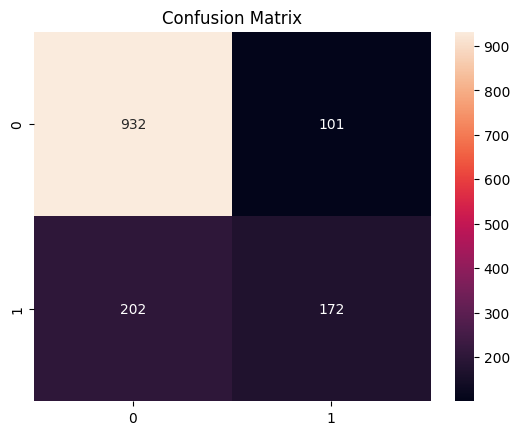

In [ ]:
# Modeling Setup

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('../data/churn.csv')

# Clean up
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode categorical columns
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include='object').columns

for col in label_cols:
    if col != 'Churn':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Train/test split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


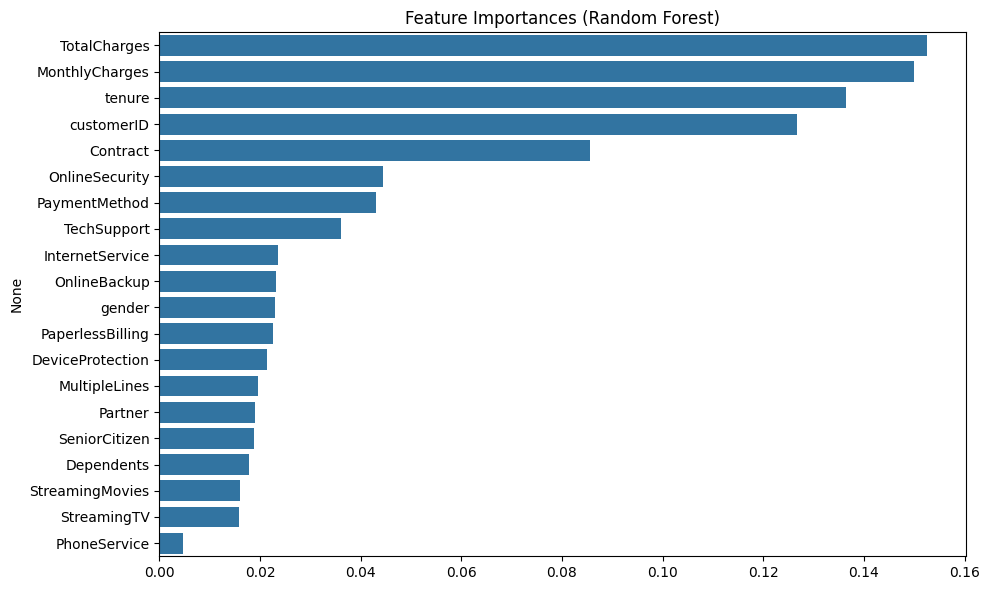

In [ ]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save trained model to the model folder
joblib.dump(model, '../model/churn_model.pkl')



FileNotFoundError: [Errno 2] No such file or directory: '../model/churn_model.pkl'